Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Turnover By Staff Category & Staff Group

In [8]:
data = pd.read_excel("Turnover by Staff Group.xlsx")
data

,Turnover By Staff Category & Staff Group,2020,2021,2022
0,Consultants,0.083766,0.093104,0.113874
1,"Medical/ Dental, other",0.057833,0.115512,0.123004
2,Nurse/ Midwife Manager,0.054035,0.056283,0.076701
3,Nurse/ Midwife Specialist & AN/MP,0.040025,0.051850,0.056742
4,Staff Nurse/ Staff Midwife,0.070143,0.084954,0.109718
5,Public Health Nurse,0.041617,0.050175,0.069001
6,Nursing/ Midwifery Student,0.069434,0.201385,0.207962
7,Nursing/ Midwifery other,0.054209,0.078415,0.088591
8,Therapy Professions,0.091620,0.108643,0.137959
9,Health Science/ Diagnostics,0.072749,0.076696,0.105532


In [9]:
data[2020] = data[2020]*100
data[2021] = data[2021]*100
data[2022] = data[2022]*100

In [10]:
data.head()

,Turnover By Staff Category & Staff Group,2020,2021,2022
0,Consultants,8.376632,9.310367,11.387435
1,"Medical/ Dental, other",5.783347,11.551179,12.300379
2,Nurse/ Midwife Manager,5.403502,5.628339,7.670105
3,Nurse/ Midwife Specialist & AN/MP,4.002476,5.184955,5.674151
4,Staff Nurse/ Staff Midwife,7.014347,8.495423,10.971804


In [12]:
data.describe()

,2020,2021,2022
count,24.000000,24.000000,24.000000
mean,6.480379,8.508657,10.969878
std,2.069653,3.821594,3.898523
min,3.271508,5.017498,5.674151
25%,5.196669,6.039214,8.530681
50%,5.920177,7.601229,10.360132
75%,7.550370,8.890037,11.562514
max,10.759268,20.138452,21.166190


In [17]:
# Calculate average turnover by staff category
data['Average Turnover'] = data[[2020, 2021, 2022]].mean(axis=1)

In [18]:
data.head()

,Turnover By Staff Category & Staff Group,2020,2021,2022,Average Turnover
0,Consultants,8.376632,9.310367,11.387435,9.691478
1,"Medical/ Dental, other",5.783347,11.551179,12.300379,9.878302
2,Nurse/ Midwife Manager,5.403502,5.628339,7.670105,6.233982
3,Nurse/ Midwife Specialist & AN/MP,4.002476,5.184955,5.674151,4.953861
4,Staff Nurse/ Staff Midwife,7.014347,8.495423,10.971804,8.827191


In [22]:
data = data.sort_values(by='Average Turnover', ascending=False)

Average Turnover

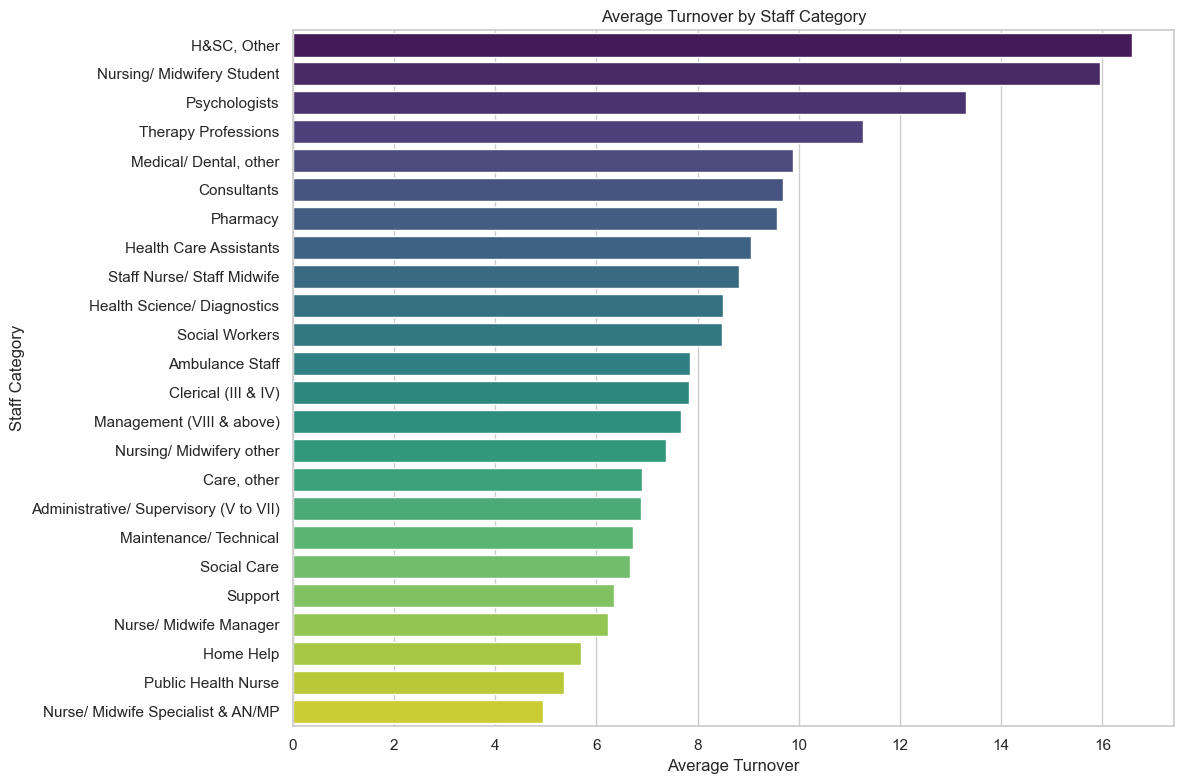

In [23]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Bar plot for average turnover by staff category
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Turnover', y='Turnover By Staff Category & Staff Group', data=data, palette='viridis')
plt.xlabel('Average Turnover')
plt.ylabel('Staff Category')
plt.title('Average Turnover by Staff Category')
plt.tight_layout()
plt.show()

Turnover trends by staff category over the years

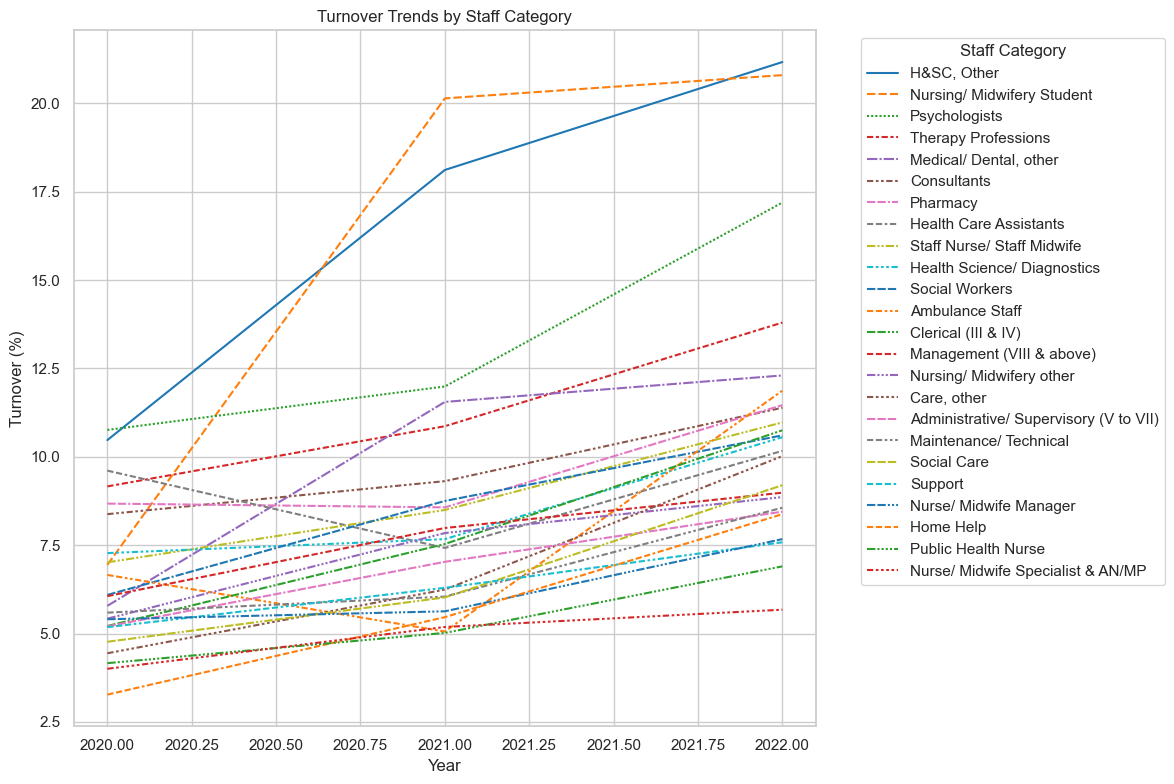

In [24]:
# Visualization 2: Line plot for turnover trends by staff category over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=data.drop('Average Turnover', axis=1).set_index('Turnover By Staff Category & Staff Group').T, palette='tab10')
plt.xlabel('Year')
plt.ylabel('Turnover (%)')
plt.title('Turnover Trends by Staff Category')
plt.legend(title='Staff Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Compare turnover distributions for each year

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


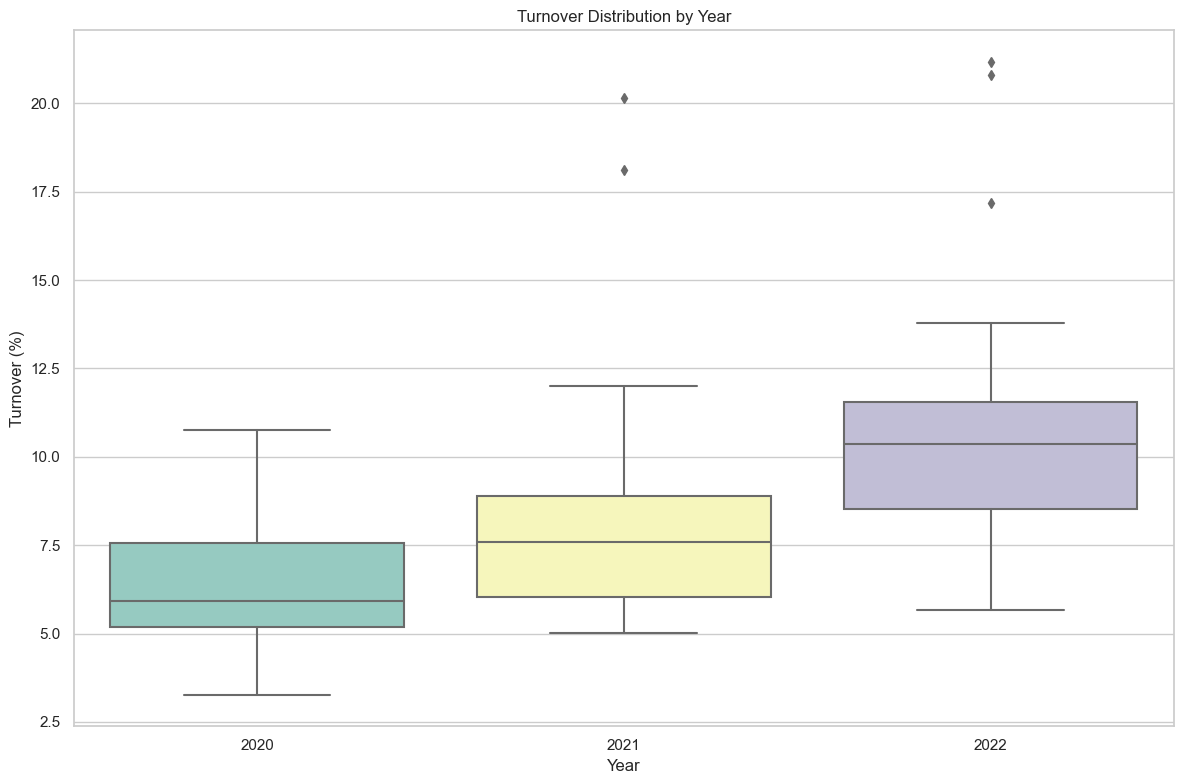

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Average Turnover', axis=1), palette='Set3')
plt.xlabel('Year')
plt.ylabel('Turnover (%)')
plt.title('Turnover Distribution by Year')
plt.tight_layout()
plt.show()

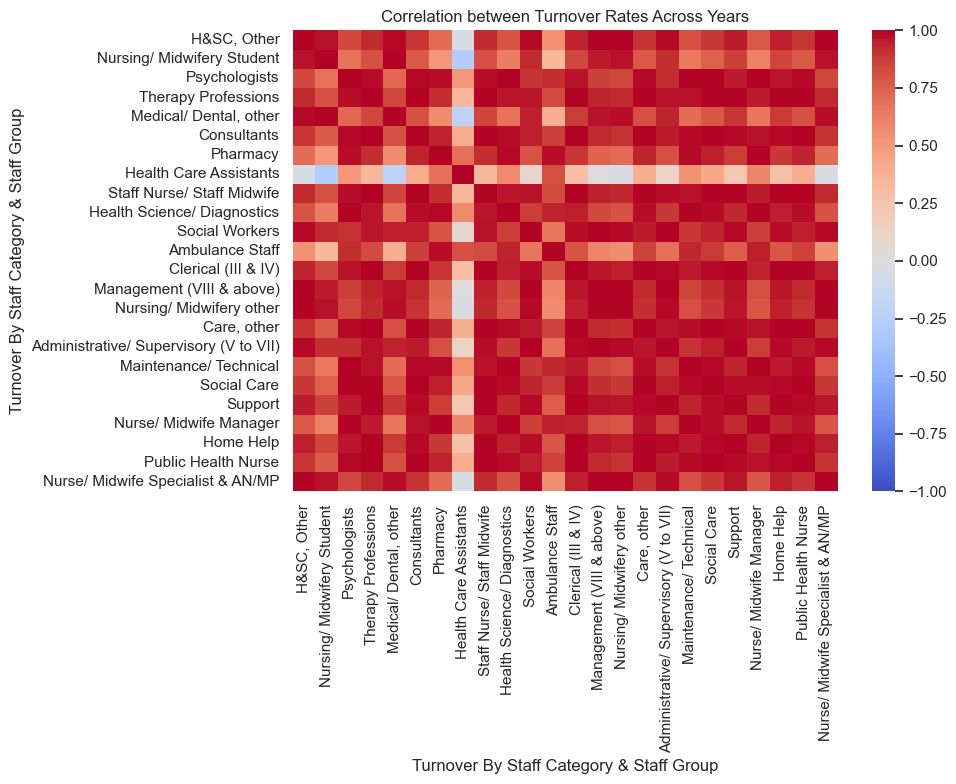

In [34]:
# Calculate the correlation matrix for turnover rates across years
correlation_matrix = data.drop(['Average Turnover'], axis=1).set_index('Turnover By Staff Category & Staff Group').T.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Turnover Rates Across Years')
plt.tight_layout()
plt.show()